#### 

# Reginol Sales Analysis

# 

In [1]:
#   --- Imoporting important Libraries ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:

#  Importing Data

sheets = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name=None)


In [3]:


# Assigning Dataframe to each Sheet



Sales_Orders = sheets['Sales Orders']
Customers = sheets['Customers']
Regions = sheets['Regions']
State_Regions = sheets['State Regions']
Products = sheets['Products']
Budgets_2017 = sheets['2017 Budgets']




### 

## Sales Orders Table Overview and Analysis

In [4]:
Sales_Orders.head(4)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852


In [5]:
Sales_Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [6]:
Sales_Orders.duplicated().sum()

0

In [7]:
Sales_Orders['Currency Code'].value_counts()

Currency Code
USD    64104
Name: count, dtype: int64

**Data Quality Assesment**

- Sales Orders data contains 64,104 sales records.
- Datatype of every column is correct.
- There are no null values or duplicated values present in the dataset.
- The currency_code column contains a single value (USD) indicating all the transactions and prices are in US dollars. We can remove the currency_code column safely.
- We can standardize the column name to lower case and replace the spaces with underscore to ensure data consistency.

In [8]:


Sales_Orders.columns = Sales_Orders.columns.str.replace(' ','_').str.lower()

del Sales_Orders['currency_code']



In [9]:
Sales_Orders.describe()

,orderdate,customer_name_index,delivery_region_index,product_description_index,order_quantity,unit_price,line_total,total_unit_cost
count,64104,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000
mean,2016-01-29 01:28:20.935979008,87.480064,495.086609,14.913141,8.441689,2284.380803,19280.682937,1432.083899
min,2014-01-01 00:00:00,1.000000,1.000000,1.000000,5.000000,167.500000,837.500000,68.675000
25%,2015-01-13 00:00:00,45.000000,247.000000,6.000000,6.000000,1031.800000,8019.900000,606.216000
50%,2016-01-27 00:00:00,87.000000,493.000000,15.000000,8.000000,1855.900000,14023.100000,1084.495500
75%,2017-02-13 00:00:00,130.000000,742.000000,24.000000,10.000000,3606.275000,27416.400000,2046.933750
max,2018-02-28 00:00:00,175.000000,994.000000,30.000000,12.000000,6566.000000,78711.600000,5498.556000
std,NaN,49.884946,285.645893,8.787032,2.276217,1663.598141,15429.602766,1107.705728


**Initial Analysis**

- This dataset contains 64,104 number of sales records spanning from January 2016 to February 2018 with the median sales transaction around January 2016, indicating that the sales are not concentrated in any particular year and are rather fairly ditributed across Years.
- We have not sold any order quantity less than 5 and the highest quatity of the items sold at once is 12 which indicates that all the orders in this dataset are in bulk quantity.
- The lowest price at which the item is sold at is 167 which is comparatively lesser, as around 75% of the price at which the unit is sold at is above 1031. It indicates that most of the revenue comes from mid to highly priced products
- The average of the total_unit_cost is comapratively lower than the average unit price indicating a Positive Gross Margin across most transactions.


**Feature Engineering**
- We can create a new column as 'Profit per unit' that will give us the profit gained with each unit.

In [10]:



Sales_Orders['profit_per_unit'] = Sales_Orders['unit_price'] - Sales_Orders['total_unit_cost']

Sales_Orders.head(4)



,ordernumber,orderdate,customer_name_index,channel,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,line_total,total_unit_cost,profit_per_unit
0,SO - 000225,2014-01-01,126,Wholesale,AXW291,364,27,6,2499.1,14994.6,1824.343,674.757
1,SO - 0003378,2014-01-01,96,Distributor,AXW291,488,20,11,2351.7,25868.7,1269.918,1081.782
2,SO - 0005126,2014-01-01,8,Wholesale,AXW291,155,26,6,978.2,5869.2,684.740,293.460
3,SO - 0005614,2014-01-01,42,Export,AXW291,473,7,7,2338.3,16368.1,1028.852,1309.448


## 

## Customers Table Overview and Analysis

In [11]:
Customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [12]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer Index  175 non-null    int64 
 1   Customer Names  175 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [13]:
Customers.duplicated().sum()

0

**Data Quality Assessment**

- Customer dataset contains a total of 175 records.
- Dataset contains no Null or duplicated values, thus requires no strucural correction
- We can change the column name to lower case and replace the spaces with underscore to ensure the data remains consistent and for ease of querying across SQL, Python and other Visulaizing tools.

In [14]:


Customers.columns = Customers.columns.str.replace(' ','_').str.lower()



In [15]:
Customers.tail()

,customer_index,customer_names
170,171,Accord Group
171,172,BB17 Company
172,173,H Ltd
173,174,Tekfly Group
174,175,SHISEIDO Ltd


## 

## Regions Table Overview and Analysis

In [16]:
Regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [17]:
Regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             994 non-null    int64  
 1   name           994 non-null    object 
 2   county         994 non-null    object 
 3   state_code     994 non-null    object 
 4   state          994 non-null    object 
 5   type           994 non-null    object 
 6   latitude       994 non-null    float64
 7   longitude      994 non-null    float64
 8   area_code      994 non-null    int64  
 9   population     994 non-null    int64  
 10  households     994 non-null    int64  
 11  median_income  994 non-null    int64  
 12  land_area      994 non-null    int64  
 13  water_area     994 non-null    int64  
 14  time_zone      994 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 116.6+ KB


In [18]:
Regions.duplicated().sum()

0

**Data Quality Review**

- we have a total of 993 records in this dataset.
- Dataset has no Null or Duplicated values as such and the Datatype of every field is right.
- We can change the column name to lower case and replace the spaces with underscore to ensure the data remains consistent and for ease of querying across SQL, Python and other Visulaizing tools.

In [19]:
Regions.head(3)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago


In [20]:
Regions.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,994.0,NaN,NaN,NaN,497.5,287.087385,1.0,249.25,497.5,745.75,994.0
name,994,923,Springfield,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county,994,412,Los Angeles County,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_code,994,48,CA,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,994,48,California,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,994,12,City,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,994.0,NaN,NaN,NaN,37.731587,5.12948,21.32435,33.943055,39.084735,41.671312,48.75955
longitude,994.0,NaN,NaN,NaN,-94.338524,17.03895,-157.84764,-112.277505,-88.20029,-80.416375,-70.25533
area_code,994.0,NaN,NaN,NaN,611.596579,239.899528,202.0,406.0,626.0,832.0,979.0
population,994.0,NaN,NaN,NaN,154012.155936,369878.041224,50138.0,61076.0,82885.5,127186.75,8550405.0


In [21]:


Regions[Regions['population']==Regions['population'].max()]


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
754,755,New York City,Richmond County/Queens County/Kings County/New...,NY,New York,City,40.66347,-73.9387,718,8550405,3113535,53373,780785193,431834008,America/New York


In [22]:


Regions[Regions['land_area']==Regions['land_area'].max()]


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
302,303,Jacksonville,Duval County,FL,Florida,City,30.33218,-81.65565,904,868031,318575,46764,1935873371,329424471,America/New York


In [23]:


Regions[Regions['water_area']==Regions['water_area'].max()]


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
870,871,Corpus Christi,Aransas County/Kleberg County/Nueces County/Sa...,TX,Texas,City,27.75425,-97.17339,361,324074,114817,50658,452109961,852118618,America/Chicago


In [24]:

(Regions['type'].value_counts()/994)*100



type
City                       72.334004
Township                   11.871227
CDP                         6.841046
Town                        5.835010
Village                     1.307847
Charter Township            0.704225
Borough                     0.503018
Other                       0.201207
Unified Government          0.100604
Consolidated Government     0.100604
Urban County                0.100604
Metropolitan Government     0.100604
Name: count, dtype: float64

**Initial Analysis**
- In the "Population" column, the Mean is double the size of Median value, which means that there is an outlier (or extreme value). 75% of the regions have the population of 127k or lesser and the maximum population is 8M. Upon further analysis, it was found that New York City has the largest population in this dataset which is also an extreme case compared to the population of other regions in the dataset.
- Jacksonville has the largest land area and Corpus Christi has the largest Water area among all the other regions present in the dataset.
-  Around 35% of the Regions in this dataset, come within the America/New York timezone.
- Around  72% of the Regions in the dataset are Cities followed by Township that contributes to 11% of the total regions.

## 

## Regions Table Overview and Analysis

In [25]:
State_Regions.head(4)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West


In [26]:
State_Regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  49 non-null     object
 1   Column2  49 non-null     object
 2   Column3  49 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [27]:
State_Regions.duplicated().sum()

0

**Data Quality Review**

- The Header value (column name) is incorrect. We can see the actual column names are on the 0th index.
- we have a total of 48 records in this dataset.
- Dataset has no Null or Duplicated values as such and the Datatype of every column is correct.
- We can change the column name to lower case and replace the spaces with underscore to ensure the data remains consistent and for ease of querying.

In [28]:


header = State_Regions.iloc[0]

State_Regions.columns = header

State_Regions = State_Regions[1:].reset_index(drop = True)

State_Regions.columns = State_Regions.columns.str.replace(" ", "_").str.lower()




In [29]:
State_Regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state_code  48 non-null     object
 1   state       48 non-null     object
 2   region      48 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


## 

## Products Overview and Analysis

In [30]:
Products.head(4)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4


In [31]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         30 non-null     int64 
 1   Product Name  30 non-null     object
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [32]:
Products.duplicated().sum()

0

**Data Quatlity Review**
- There are a total of 30 products.
- Dataset has only two columns and the datatype of the columns are correct.
- No missing of duplicated values are present in the Product dataset.
- We will be transforming the columns names to lower case and replace the spaces with underscore.

In [33]:

Products.columns = Products.columns.str.replace(" ", "_").str.lower()



### 

## Budgets_2017 Overview and Analysis

In [34]:
Budgets_2017.head(4)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824


In [35]:
Budgets_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  30 non-null     object 
 1   2017 Budgets  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


In [36]:
Budgets_2017.duplicated().sum()

0

**Data Quatlity Review**
- There are a total of 30 rows and 2 columns. Provides information about revenue target of all the products.
- Dataset has only two columns and the datatype of the columns are correct.
- No missing of duplicated values are present in the Product dataset.
- We will be transforming the columns names to lower case and replace the spaces with underscore.

In [37]:

Budgets_2017.columns = Budgets_2017.columns.str.replace(" ", "_").str.lower()



# 

## Data Wrangling

**Merging Sales Order table and Customer Table**

In [38]:

Sales_Orders = Sales_Orders.merge(
                    Customers,
                    how = 'left',
                    left_on = 'customer_name_index',
                    right_on = 'customer_index'
                    )

- We got the Customer Name in our Sales Order Dataset.

**Merging Sales Order table and Product Table**

In [39]:

Sales_Orders = Sales_Orders.merge(
                    Products,
                    how = 'left',
                    left_on = 'product_description_index',
                    right_on = 'index'
                    )

- We got the Product Name in our Sales Order Dataset.

**Merging Sales Order table and Regions Table**

In [40]:

Sales_Orders = Sales_Orders.merge(
                    Regions,
                    how = 'left',
                    left_on = 'delivery_region_index',
                    right_on = 'id'
                    )

- We added all the columns and data from Regions table to our Sales Orders table.

In [41]:
Sales_Orders.head(2)

,ordernumber,orderdate,customer_name_index,channel,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,line_total,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,AXW291,364,27,6,2499.1,14994.6,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,AXW291,488,20,11,2351.7,25868.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis


In [42]:
Regions.head(2)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago


**Merging Sales Order table and State Regions Table**

In [43]:

Sales_Orders = Sales_Orders.merge(
                    State_Regions,
                    how = 'left',
                    left_on = 'state_code',
                    right_on = 'state_code'
                    )

- We added the state and region columns from State Region table to our Sales Orders table.

In [44]:
Sales_Orders.head(2)

,ordernumber,orderdate,customer_name_index,channel,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,line_total,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,state_y,region
0,SO - 000225,2014-01-01,126,Wholesale,AXW291,364,27,6,2499.1,14994.6,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,Georgia,South
1,SO - 0003378,2014-01-01,96,Distributor,AXW291,488,20,11,2351.7,25868.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Indiana,Midwest


**Merging Sales Order table and Budget 2017 Table**

In [45]:

Sales_Orders = Sales_Orders.merge(
                    Budgets_2017,
                    how = 'left',
                    left_on = 'product_name',
                    right_on = 'product_name'
                    )

- We added the 2017 Budget column from Budget 2017 table to our Sales Orders table.

**There are surely some redundant and unnecessary columns left in our final dataset. We will remove these columns first then finalize our dataset.**

In [46]:
Sales_Orders.columns

Index(['ordernumber', 'orderdate', 'customer_name_index', 'channel',
       'warehouse_code', 'delivery_region_index', 'product_description_index',
       'order_quantity', 'unit_price', 'line_total', 'total_unit_cost',
       'profit_per_unit', 'customer_index', 'customer_names', 'index',
       'product_name', 'id', 'name', 'county', 'state_code', 'state_x', 'type',
       'latitude', 'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'state_y',
       'region', '2017_budgets'],
      dtype='object')

In [47]:



Sales_Orders.drop(columns=['customer_name_index','delivery_region_index','product_description_index',
                          'customer_index','index','state_y','id'],axis = 1, inplace = True)


Sales_Orders.rename(columns={'state_x':'state','name':'region_name'}, inplace = True)



In [48]:
Sales_Orders.columns

Index(['ordernumber', 'orderdate', 'channel', 'warehouse_code',
       'order_quantity', 'unit_price', 'line_total', 'total_unit_cost',
       'profit_per_unit', 'customer_names', 'product_name', 'region_name',
       'county', 'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income', 'land_area',
       'water_area', 'time_zone', 'region', '2017_budgets'],
      dtype='object')

- We will only keep some of the columns from the above for our analysis and if needed we can add the columns in the future as well.

In [49]:
cols =    ['ordernumber', 'orderdate', 'channel',
       'order_quantity', 'unit_price', 'line_total', 'total_unit_cost',
       'profit_per_unit', 'customer_names', 'product_name',
       'county', 'state_code', 'state', 'type', 'latitude', 'longitude',
        'population', 'region', '2017_budgets']

In [50]:

data = Sales_Orders[cols]



In [51]:
data.head(5)

,ordernumber,orderdate,channel,order_quantity,unit_price,line_total,total_unit_cost,profit_per_unit,customer_names,product_name,county,state_code,state,type,latitude,longitude,population,region,2017_budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,674.757,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,City,32.08354,-81.09983,145674,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,1081.782,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,City,39.61366,-86.10665,55586,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,293.460,Amerisourc Corp,Product 26,Alameda County,CA,California,City,37.66243,-121.87468,79510,West,5685138.270
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,1309.448,Colgate-Pa Group,Product 7,Monroe County,IN,Indiana,City,39.16533,-86.52639,84067,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,1031.130,Deseret Group,Product 8,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,58007,Northeast,1085037.329


- We only have the budget for the 2017 records but upon joining the table we got the budget of 2017 to all the products even to the years other than 2017. We will mark those years as na for budget 2017 column. Then we will change the column name from 'budget_107' to 'budget'.
- We will also change the 'line_total' column to 'total_sales'


In [52]:

data.loc[data['orderdate'].dt.year != 2017, '2017_budgets'] = pd.NA


data.rename(columns={'line_total':'revenue','type':'region_type','2017_budget':'budget'}, inplace = True)



- We can make a separate dataset for 2017 as we have an extra important column for that dataset. i,e 'Budget 2017'.
- And we will drop the 'Budget 2017' column from our final dataset to do further EDA part and extract the Cleaned Dataset.

In [53]:

data_2017 = data[data['orderdate'].dt.year == 2017].reset_index(drop = True)

data_2017.to_csv('Regional Sales 2017.csv')


In [54]:

del data['2017_budgets']

data.to_csv('Regional Sales (Cleaned).csv')



# 

# 

## Feature Engineering

In [55]:
data.head(2)

,ordernumber,orderdate,channel,order_quantity,unit_price,revenue,total_unit_cost,profit_per_unit,customer_names,product_name,county,state_code,state,region_type,latitude,longitude,population,region
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,674.757,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,City,32.08354,-81.09983,145674,South
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,1081.782,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,City,39.61366,-86.10665,55586,Midwest


**We will create 3 columns:**
- "Total Cost": Give us the total manufacturing cost of total number of units.
- "Profit": Give us the overall Profit we got from a particular Order.
- "Profit Margin Percentage": Give us the percentage of the overall profit per order.

In [56]:


data['total_cost'] = data['total_unit_cost'] * data['order_quantity']

data['profit'] = data['revenue'] - data['total_cost']

data['profit_margin_perc'] = (data['profit']/data['revenue']) * 100


del data['profit_per_unit']


- I have deleted the profit_per_unit column from the dataset, as we will be not needing it after adding the overall profit column.

In [57]:
data.head(3)

,ordernumber,orderdate,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,county,state_code,state,region_type,latitude,longitude,population,region,total_cost,profit,profit_margin_perc
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,City,32.08354,-81.09983,145674,South,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,City,39.61366,-86.10665,55586,Midwest,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,CA,California,City,37.66243,-121.87468,79510,West,4108.440,1760.760,30.0


In [58]:
data[['total_unit_cost','revenue','unit_price','total_cost','profit','profit_margin_perc']] = data[['total_unit_cost','revenue','unit_price','total_cost','profit','profit_margin_perc']].round(2)

Rounded all the numerical columns to two decimal digits for the ease of calculations in the analysis.

In [59]:
data.head(3)

,ordernumber,orderdate,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,county,state_code,state,region_type,latitude,longitude,population,region,total_cost,profit,profit_margin_perc
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.34,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,City,32.08354,-81.09983,145674,South,10946.06,4048.54,27.0
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.92,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,City,39.61366,-86.10665,55586,Midwest,13969.10,11899.60,46.0
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.74,Amerisourc Corp,Product 26,Alameda County,CA,California,City,37.66243,-121.87468,79510,West,4108.44,1760.76,30.0


# 

# 

# Exploratory Data Analysis

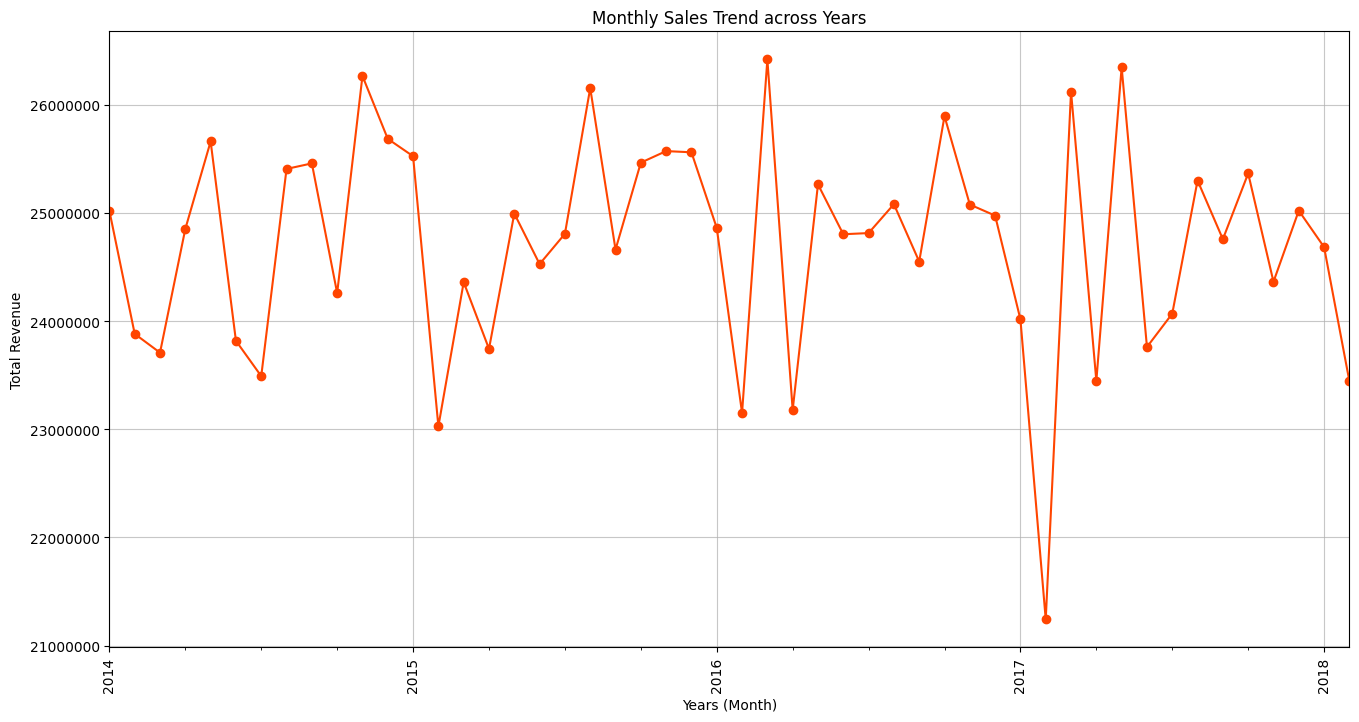

In [60]:
#    ----    Monthly Sales Analysis over time.   ----


data['monthly_order'] = data['orderdate'].dt.to_period('M')

monthly_sales = data.groupby('monthly_order')['revenue'].sum().sort_index()

monthly_sales.index = monthly_sales.index.to_timestamp()


plt.figure(figsize=(16,8))

monthly_sales.plot(marker = 'o', color = 'orangered')


plt.ticklabel_format(style='plain', axis='y')   #for actual values in y-axis not values in le7 format.


plt.title('Monthly Sales Trend across Years')
plt.xlabel('Years (Month)')
plt.ylabel('Total Revenue')

plt.xticks(rotation = 90)
plt.grid(alpha = 0.7)

plt.show()



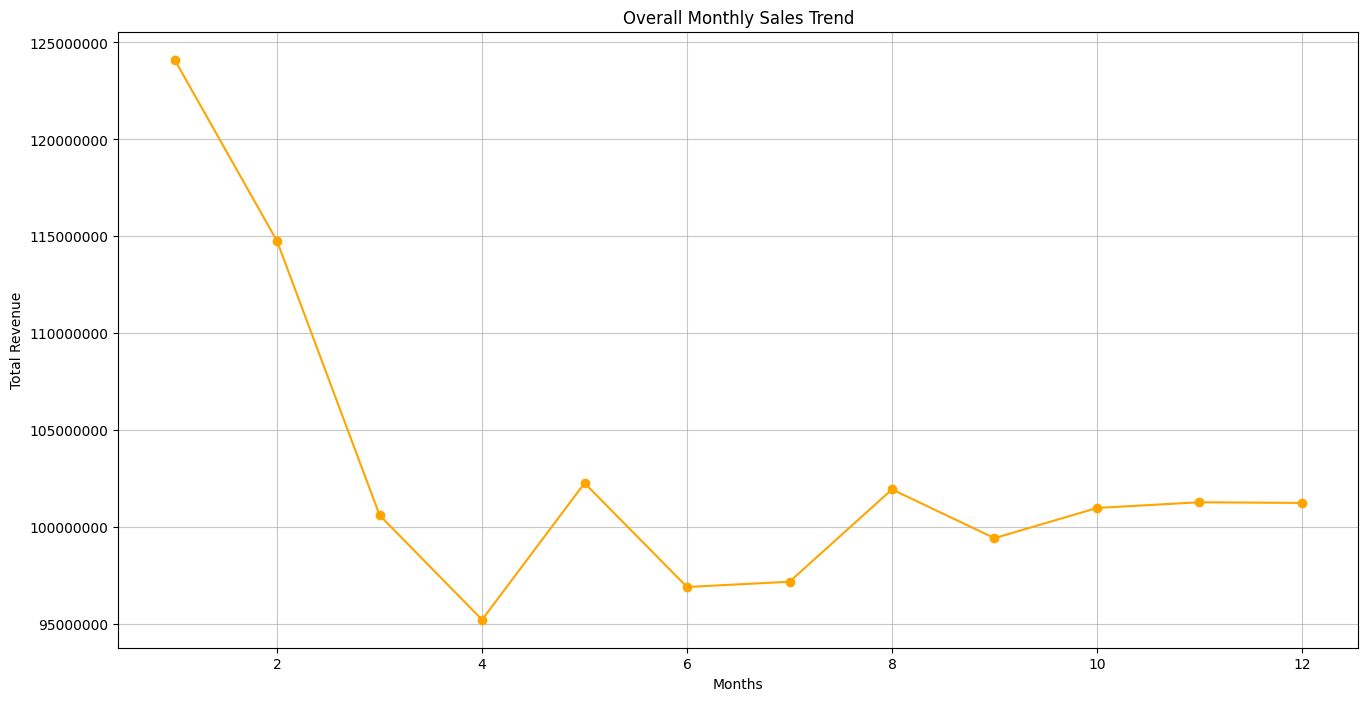

In [61]:
#   ---   Overall Monthly Sales from all Years   ---


monthly_sales_overall = data.groupby(data['orderdate'].dt.month)['revenue'].sum().sort_index()



plt.figure(figsize=(16,8))

monthly_sales_overall.plot(marker = 'o', color = 'orange')


plt.ticklabel_format(style='plain', axis='y')   #for actual values in y-axis not values in le7 format.


plt.title('Overall Monthly Sales Trend')
plt.xlabel('Months')
plt.ylabel('Total Revenue')


plt.grid(alpha = 0.7)

plt.show()





We only had the result of the January and February in case of year 2018. That may not tell us the actual overall sales of the months in different years. So, we will do the analysis of sales by month without considering the Year (2018).

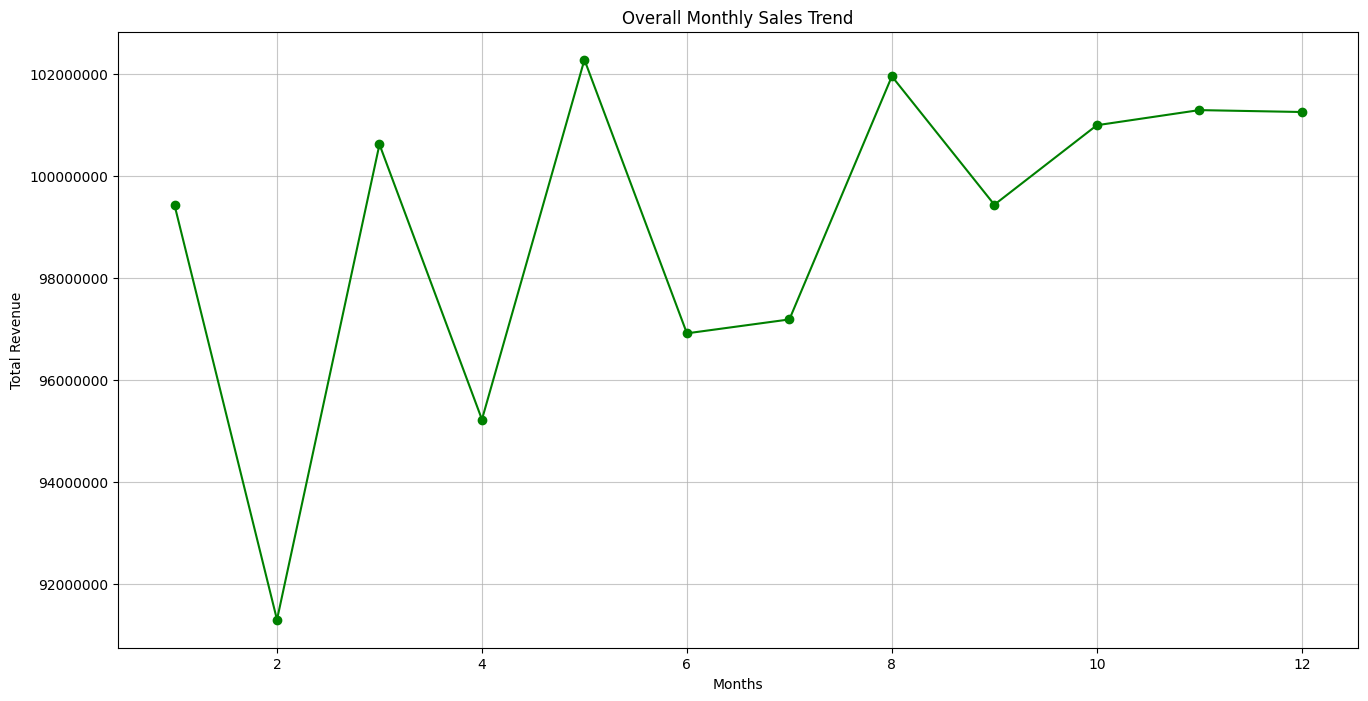

In [62]:
#   ---   Overall Monthly Sales from all Years   ---


monthly_sales_overall = data.groupby(data[data['orderdate'].dt.year !=2018]['orderdate']
                                     .dt.month)['revenue'].sum().sort_index()



plt.figure(figsize=(16,8))

monthly_sales_overall.plot(marker = 'o', color = 'green')


plt.ticklabel_format(style='plain', axis='y')   #for actual values in y-axis not values in le7 format.


plt.title('Overall Monthly Sales Trend')
plt.xlabel('Months')
plt.ylabel('Total Revenue')


plt.grid(alpha = 0.7)

plt.show()



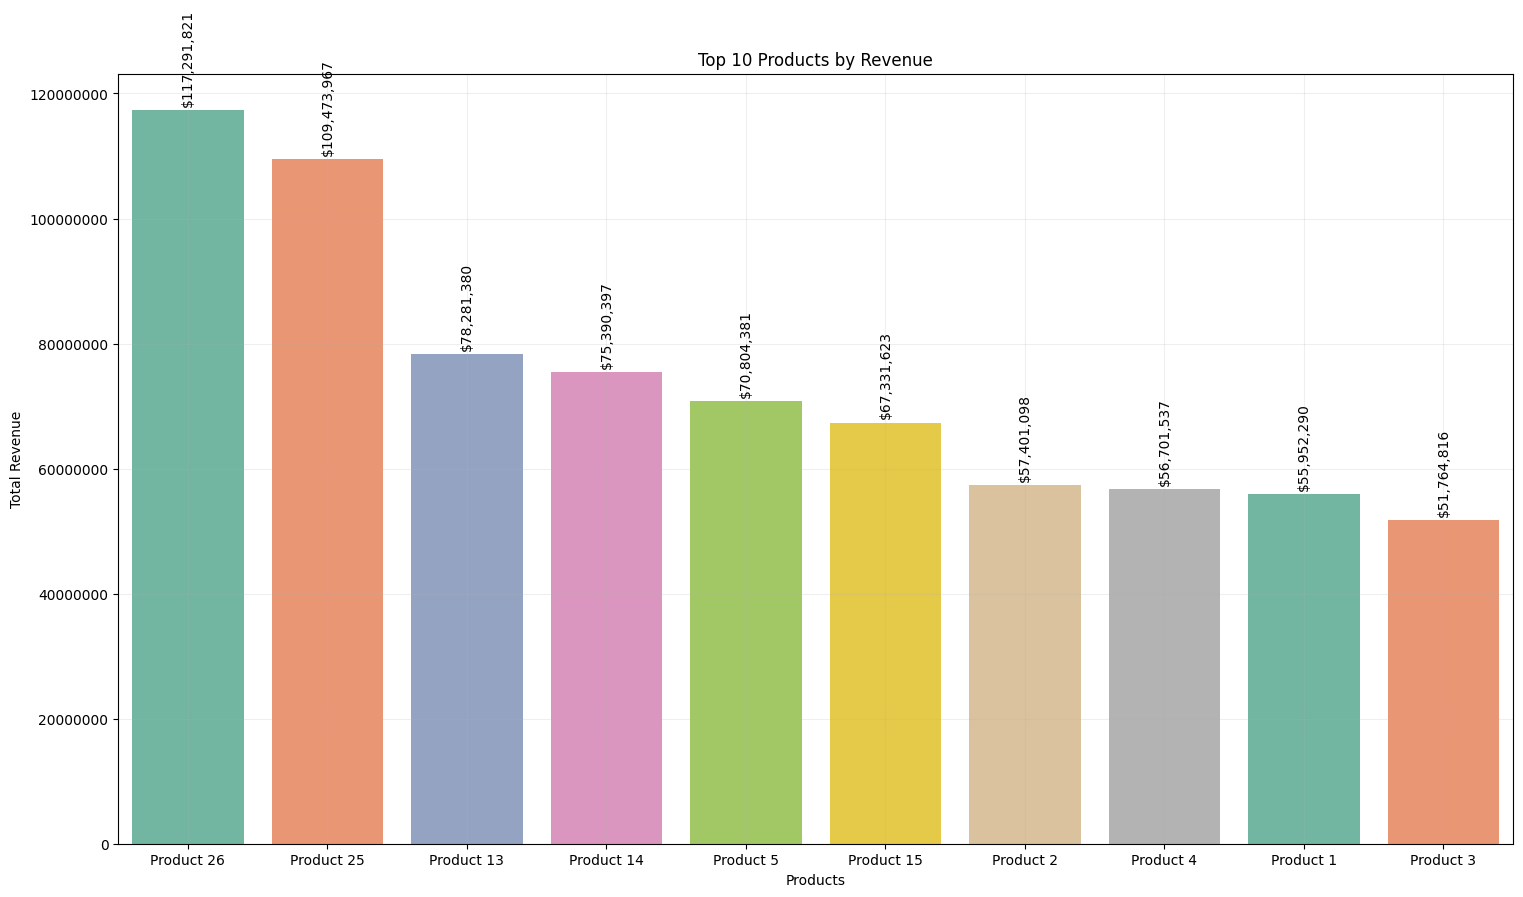

In [63]:
#   ---   Top 10 Products by Revenue   ---

group_product_revenue = data.groupby('product_name')['revenue'].sum().reset_index()


top_10_products_by_revenue = group_product_revenue.sort_values(by = 'revenue', ascending=False).head(10)




plt.figure(figsize=(18,10))


ax = sns.barplot(data = top_10_products_by_revenue, x = 'product_name', y = 'revenue', palette='Set2')

ax.ticklabel_format(style='plain', axis='y')


for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', padding=3, rotation=90)


plt.title('Top 10 Products by Revenue')
plt.xlabel('Products')
plt.ylabel('Total Revenue')





plt.grid(alpha = 0.2)

plt.show()




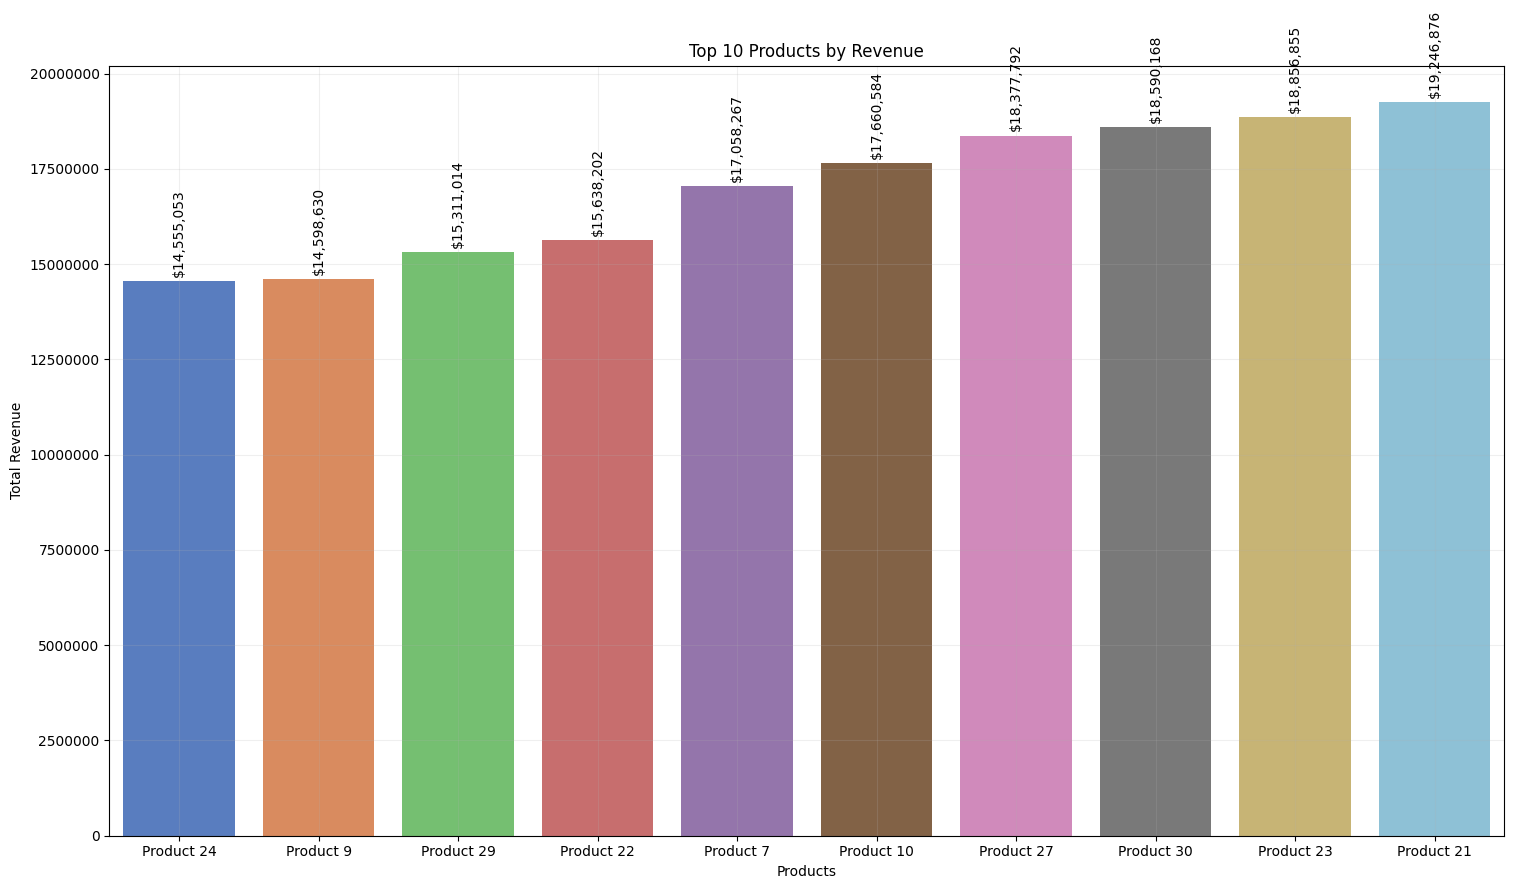

In [64]:
#   ---   Top 10 Products by Revenue   ---

group_product_revenue = data.groupby('product_name')['revenue'].sum().reset_index()


top_10_products_by_revenue = group_product_revenue.sort_values(by = 'revenue',ascending=False).tail(10).sort_values(by = 'revenue', ascending=True)




plt.figure(figsize=(18,10))


ax = sns.barplot(data = top_10_products_by_revenue, x = 'product_name', y = 'revenue', palette='muted')

ax.ticklabel_format(style='plain', axis='y')


for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', padding=3, rotation=90)


plt.title('Top 10 Products by Revenue')
plt.xlabel('Products')
plt.ylabel('Total Revenue')





plt.grid(alpha = 0.2)

plt.show()




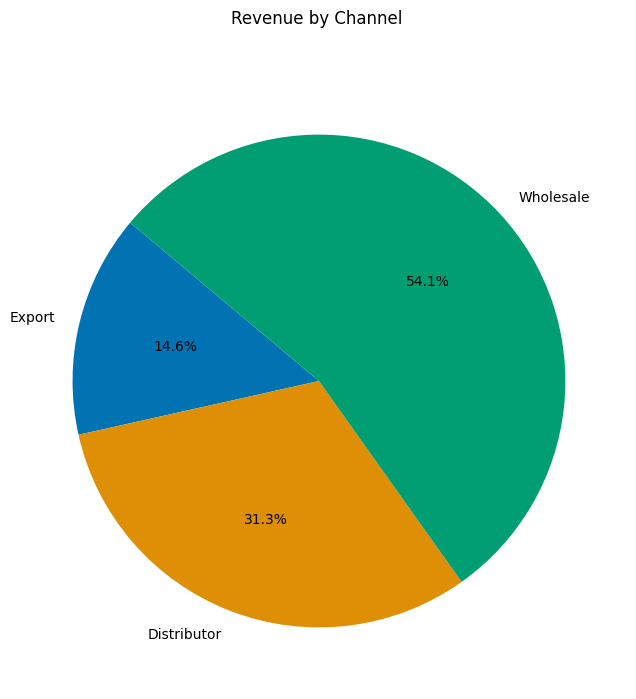

In [65]:
#   ---   Sales by Channel   ---


revenue_by_channel = data.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(14, 8))

# explode = [0.1 if v == category_qty.max() else 0 for v in category_qty]

plt.pie(
    revenue_by_channel,
    labels=revenue_by_channel.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('colorblind')
)



plt.title("Revenue by Channel \n\n")
plt.show()



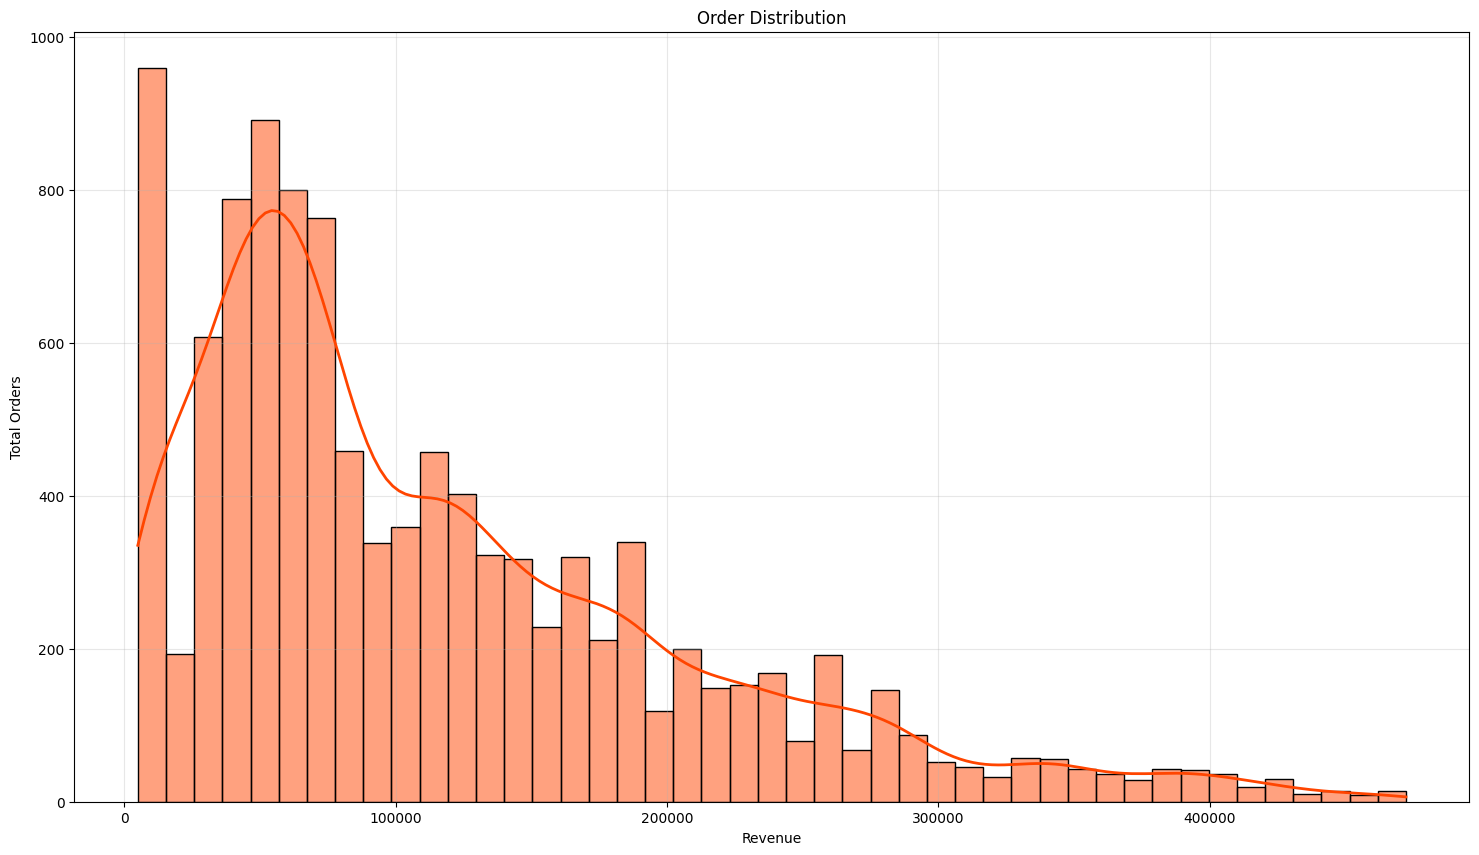

In [66]:
revenue_distribution = data.groupby('ordernumber')['revenue'].sum()


plt.figure(figsize=(18,10))


ax = sns.histplot(revenue_distribution, color='orangered', kde=True, line_kws={'linewidth': 2})

ax.ticklabel_format(style='plain', axis='y')



plt.title('Order Distribution')
plt.xlabel('Revenue')
plt.ylabel('Total Orders')





plt.grid(alpha = 0.3)

plt.show()



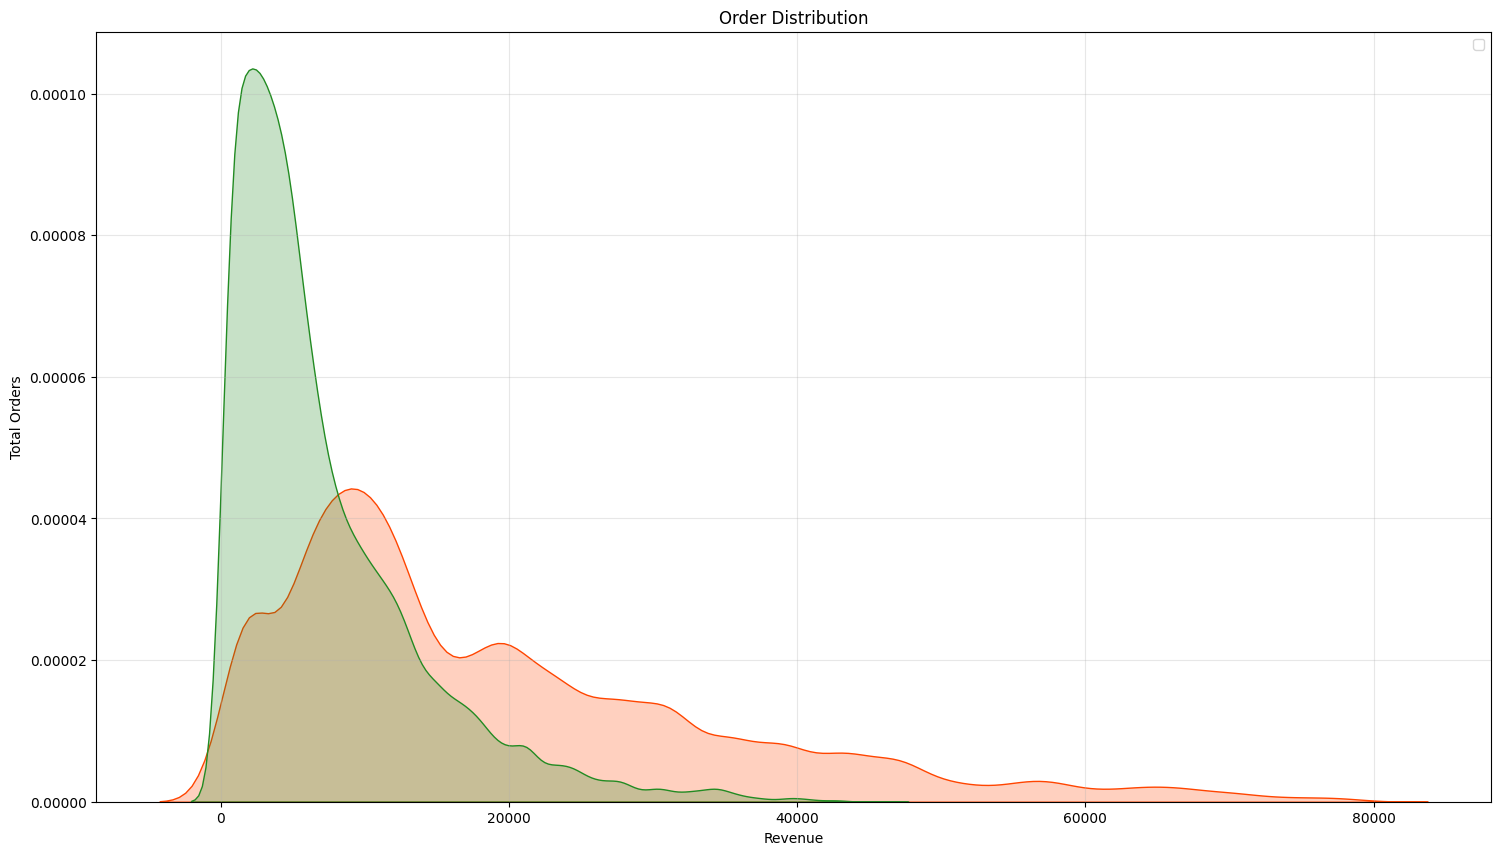

In [73]:



plt.figure(figsize=(18,10))


ax = sns.kdeplot(data['revenue'], color='orangered', shade = True)

ax = sns.kdeplot(data['profit'], color='forestgreen', shade = True)

ax.ticklabel_format(style='plain', axis='y')



plt.title('Order Distribution')
plt.xlabel('Revenue')
plt.ylabel('Total Orders')

plt.legend()



plt.grid(alpha = 0.3)

plt.show()



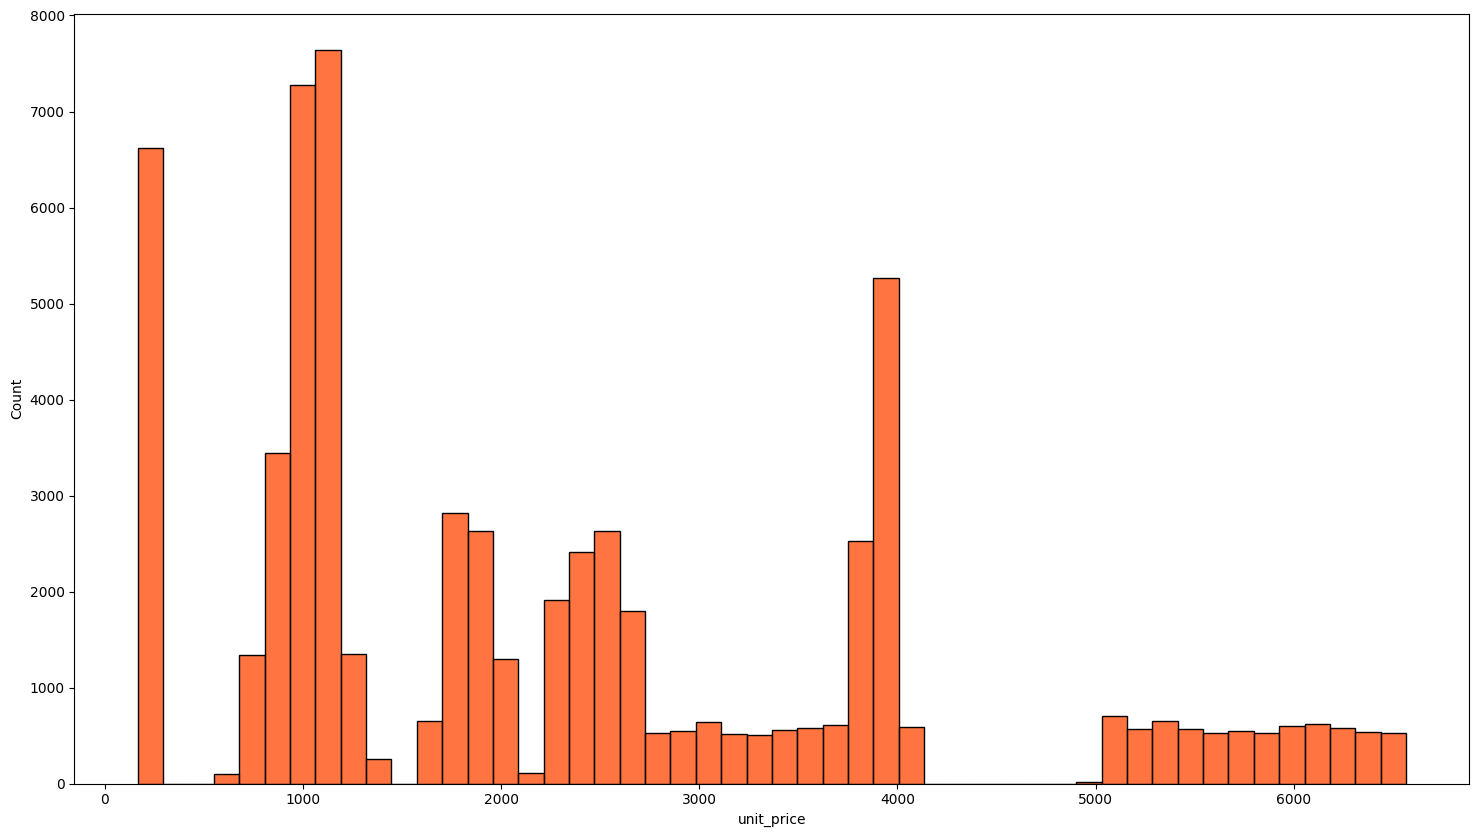

In [68]:

plt.figure(figsize=(18,10))


ax = sns.histplot(data['unit_price'], color='orangered')

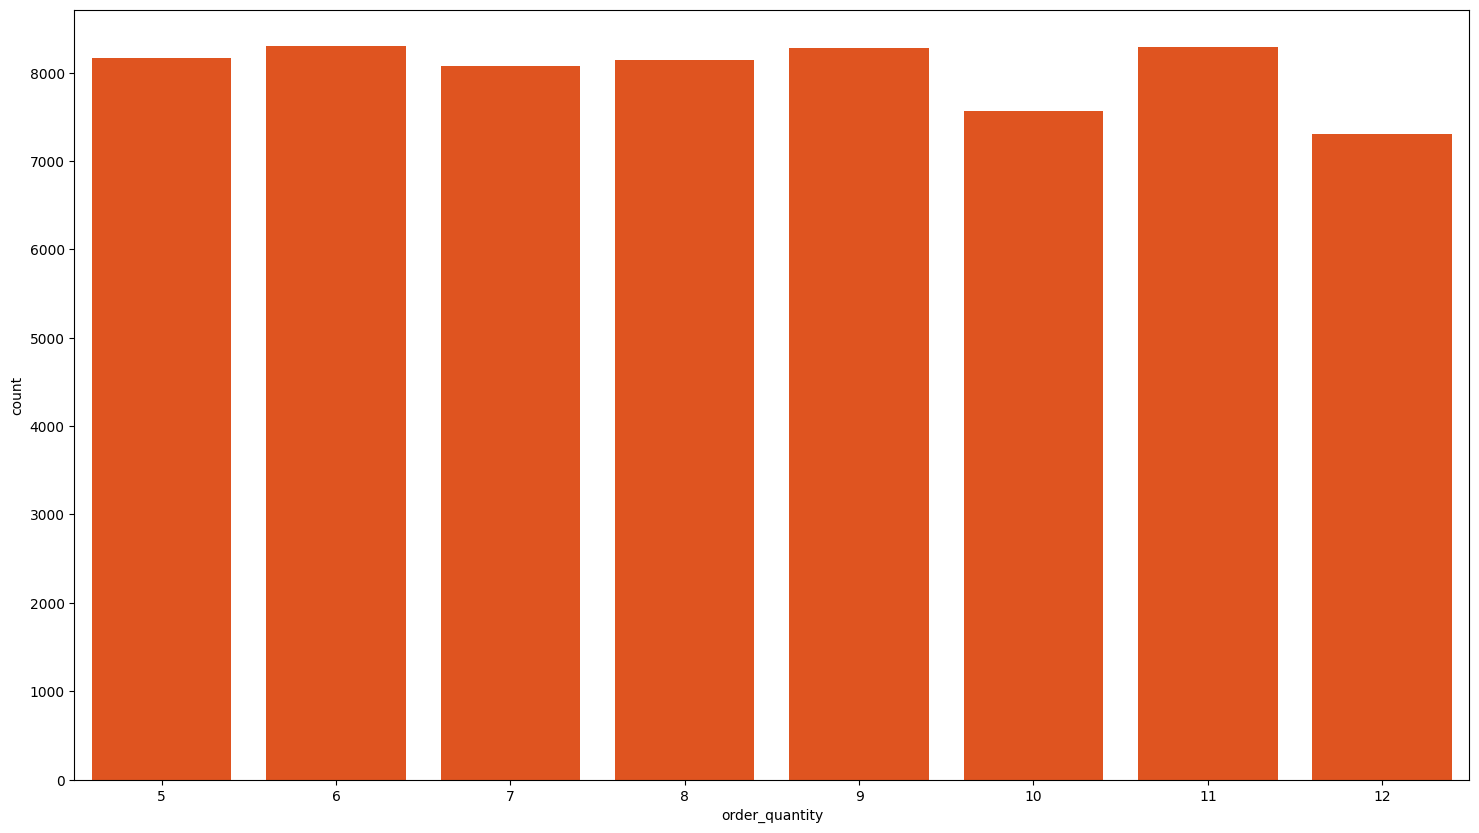

In [69]:
plt.figure(figsize=(18,10))


ax = sns.barplot(data['order_quantity'].value_counts(), color='orangered')



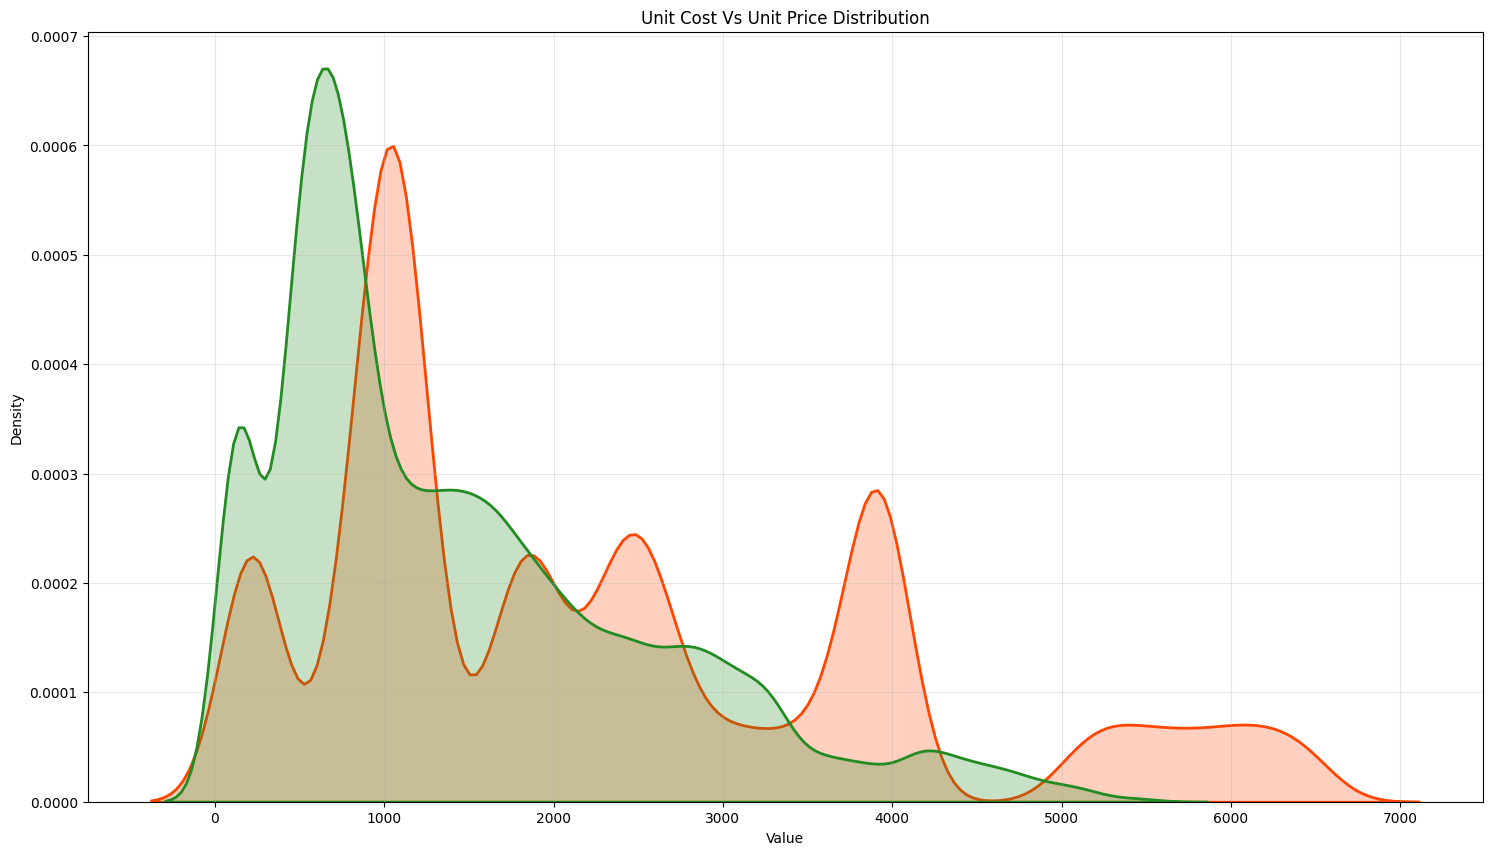

In [81]:



plt.figure(figsize=(18,10))


sns.kdeplot(
    data['unit_price'],
    color='orangered',
    linewidth=2,
    label='Unit Price',
    shade = True
)

sns.kdeplot(
    data['total_unit_cost'],
    color='forestgreen',
    linewidth=2,
    label='Unit Cost',
    shade = True
)

ax.ticklabel_format(style='plain', axis='y')



plt.title('Unit Cost Vs Unit Price Distribution')
plt.xlabel('Value')
plt.ylabel('Density')





plt.grid(alpha = 0.3)

plt.show()



In [100]:


state_summary = (
    data.groupby
    ('state', as_index=False).agg(total_revenue=
                                 ('revenue', 'sum'),total_profit=('profit', 'sum'),
                                 total_orders=('ordernumber', 'nunique')))


top_5_states = state_summary.sort_values(
    by='total_revenue', ascending=False
).head(5)

bottom_5_states = state_summary.sort_values(
    by='total_revenue', ascending=True
).head(5)


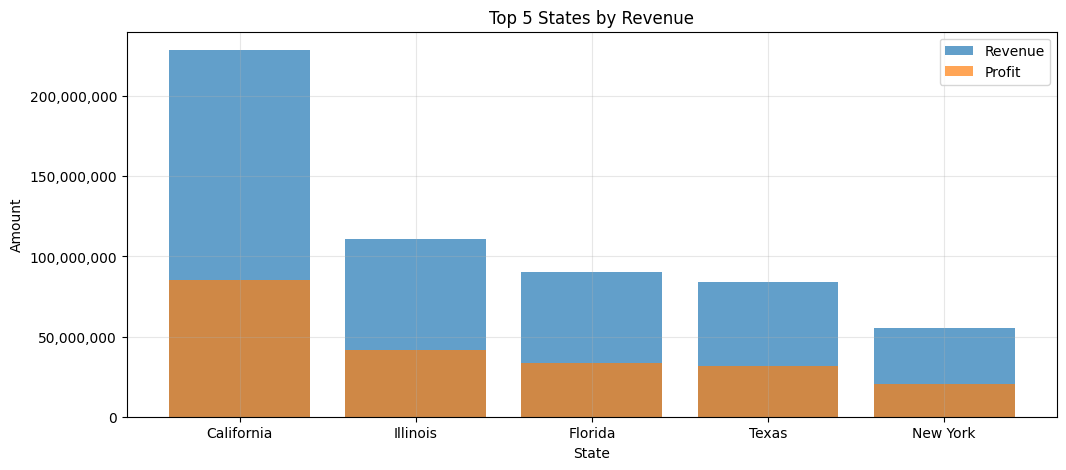

In [107]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12,5))

rev_bars = plt.bar(
    top_5_states['state'],
    top_5_states['total_revenue'],
    label='Revenue',
    alpha=0.7
)

prof_bars = plt.bar(
    top_5_states['state'],
    top_5_states['total_profit'],
    label='Profit',
    alpha=0.7
)

plt.title('Top 5 States by Revenue')
plt.xlabel('State')
plt.ylabel('Amount')

ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.StrMethodFormatter('{x:,.0f}')
)

plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [105]:
top_5_states

,state,total_revenue,total_profit,total_orders
3,California,228785436.0,85508386.86,7613
11,Illinois,111050965.7,41517223.39,4607
8,Florida,90204679.5,33619108.22,3836
41,Texas,84011903.0,31442530.05,3582
30,New York,55534960.0,20555584.52,2543


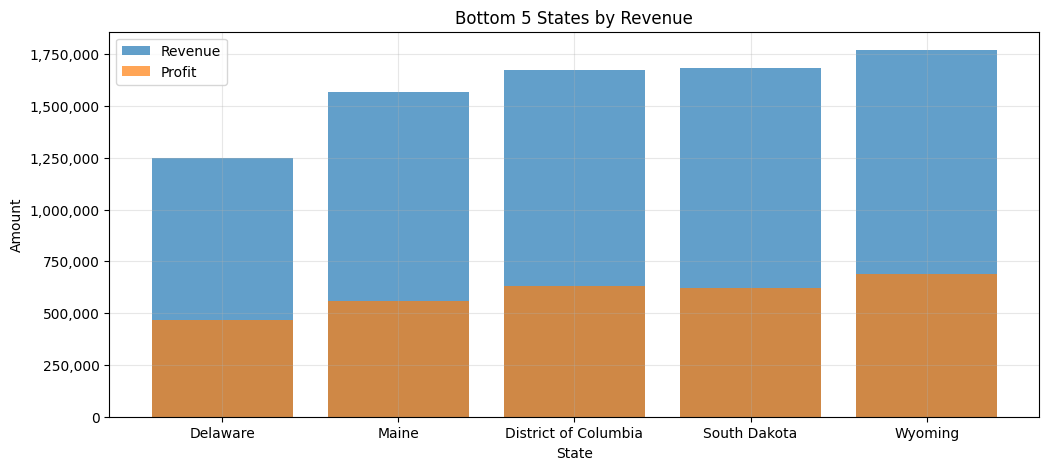

In [106]:
plt.figure(figsize=(12,5))

rev_bars = plt.bar(
    bottom_5_states['state'],
    bottom_5_states['total_revenue'],
    label='Revenue',
    alpha=0.7
)

prof_bars = plt.bar(
    bottom_5_states['state'],
    bottom_5_states['total_profit'],
    label='Profit',
    alpha=0.7
)

plt.title('Bottom 5 States by Revenue')
plt.xlabel('State')
plt.ylabel('Amount')

ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.StrMethodFormatter('{x:,.0f}')
)

plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [104]:
bottom_5_states

,state,total_revenue,total_profit,total_orders
6,Delaware,1248591.9,466776.00,70
17,Maine,1567284.1,558862.12,73
7,District of Columbia,1674859.3,630421.57,83
39,South Dakota,1681224.3,622539.68,101
46,Wyoming,1769825.1,688726.18,103


In [70]:
data.head(7)

,ordernumber,orderdate,channel,order_quantity,unit_price,revenue,total_unit_cost,customer_names,product_name,county,...,state,region_type,latitude,longitude,population,region,total_cost,profit,profit_margin_perc,monthly_order
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.34,Rhynoodle Ltd,Product 27,Chatham County,...,Georgia,City,32.08354,-81.09983,145674,South,10946.06,4048.54,27.0,2014-01
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.92,Thoughtmix Ltd,Product 20,Johnson County,...,Indiana,City,39.61366,-86.10665,55586,Midwest,13969.10,11899.60,46.0,2014-01
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.74,Amerisourc Corp,Product 26,Alameda County,...,California,City,37.66243,-121.87468,79510,West,4108.44,1760.76,30.0,2014-01
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.85,Colgate-Pa Group,Product 7,Monroe County,...,Indiana,City,39.16533,-86.52639,84067,Midwest,7201.96,9166.14,56.0,2014-01
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.27,Deseret Group,Product 8,Hartford County,...,Connecticut,Town,41.77524,-72.52443,58007,Northeast,10082.16,8249.04,45.0,2014-01
5,SO - 0010394,2014-01-01,Export,11,5219.3,57412.3,4332.02,Zoovu Corp,Product 23,Hennepin County,...,Minnesota,City,44.91330,-93.50329,51669,Midwest,47652.21,9760.09,17.0,2014-01
6,SO - 0008865,2014-01-01,Wholesale,7,2874.3,20120.1,1667.09,Kare Corp,Product 1,Norfolk County,...,Massachusetts,Town,42.32385,-71.14200,59195,Northeast,11669.66,8450.44,42.0,2014-01


In [109]:
top_5_customers_orders = (
    data
    .groupby('customer_names')['ordernumber']
    .nunique()
    .reset_index(name='total_orders')
    .sort_values(by='total_orders', ascending=False)
    .head(5)
)

top_5_customers_orders


,customer_names,total_orders
72,Kare Corp,90
106,Realbuzz Ltd,88
133,Talane Group,86
4,Aibox Company,86
40,Dazzlesphe Corp,81


In [112]:
top_5_customers_sales = (
    data
    .groupby('customer_names')['revenue']
    .sum()
    .reset_index(name='total_revenue')
    .sort_values(by='total_revenue', ascending=False)
    .head(5)
)

top_5_customers_sales


,customer_names,total_revenue
4,Aibox Company,12641251.8
131,State Ltd,12220639.2
101,Pixoboo Corp,10986459.0
97,Organon Corp,10955826.6
106,Realbuzz Ltd,10753299.0


In [115]:
customer_summary = (
    data
    .groupby('customer_names')
    .agg(
        total_orders=('ordernumber', 'nunique'),
        total_revenue=('revenue', 'sum')
    )
    .reset_index()
)

customer_summary.sort_values(
    by='total_revenue', ascending=False
).head(5)


,customer_names,total_orders,total_revenue
4,Aibox Company,86,12641251.8
131,State Ltd,79,12220639.2
101,Pixoboo Corp,79,10986459.0
97,Organon Corp,77,10955826.6
106,Realbuzz Ltd,88,10753299.0


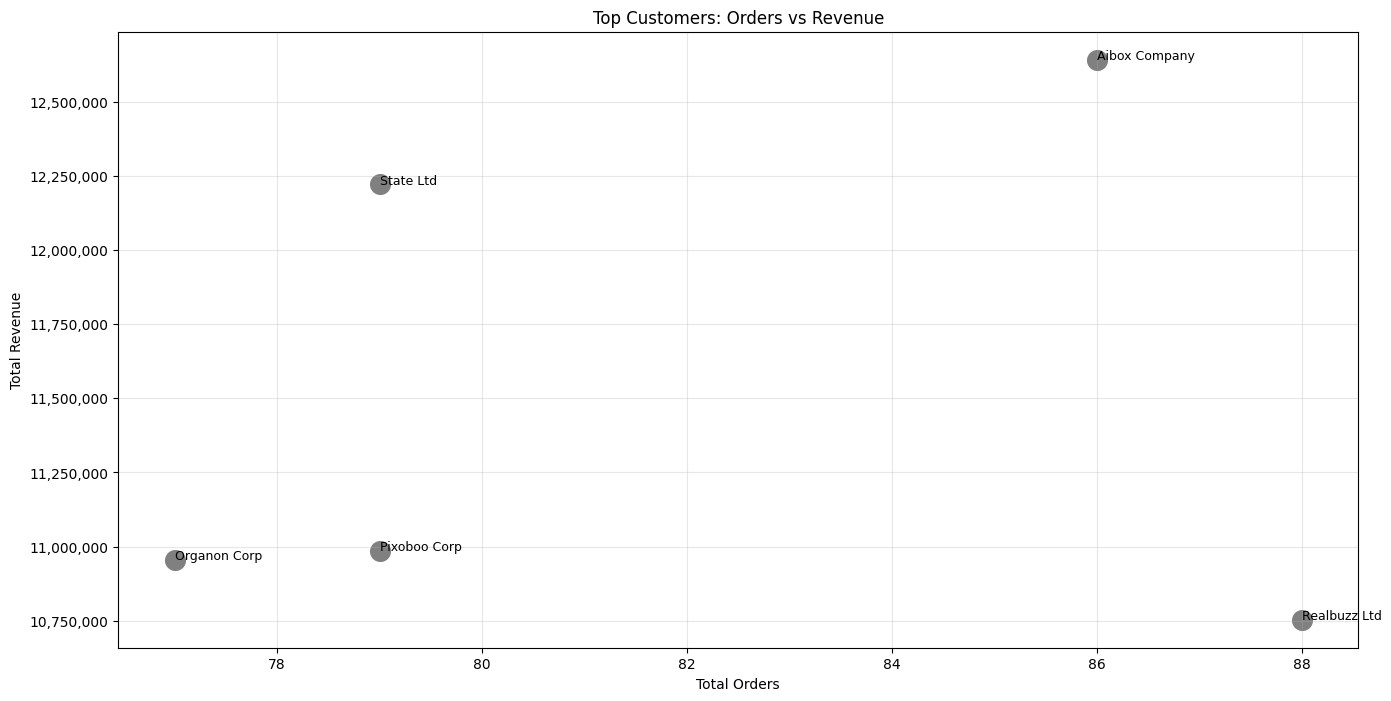

In [137]:


plt.figure(figsize=(16,8))

top_customers = customer_summary.sort_values(
    by='total_revenue', ascending=False
).head(5)



plt.scatter(
    top_customers['total_orders'],
    top_customers['total_revenue'],
    s=200,
    color='grey'
)

for _, row in top_customers.iterrows():
    plt.text(
        row['total_orders'],
        row['total_revenue'],
        row['customer_names'],
        fontsize=9,
        ha='left'
    )

plt.title('Top Customers: Orders vs Revenue')
plt.xlabel('Total Orders')
plt.ylabel('Total Revenue')

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.grid(alpha=0.3)
plt.show()


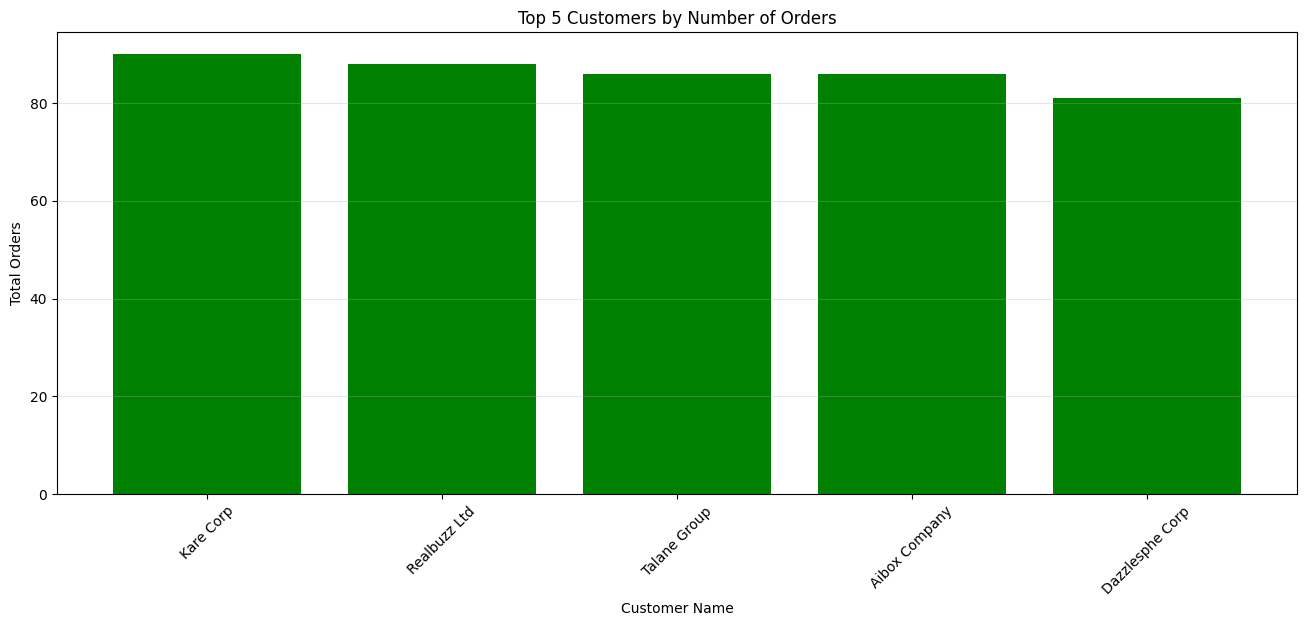

In [131]:
plt.figure(figsize=(16,6))

plt.bar(
    top_5_customers_orders['customer_names'],
    top_5_customers_orders['total_orders'],
    color='green'
)

plt.title('Top 5 Customers by Number of Orders')
plt.xlabel('Customer Name')
plt.ylabel('Total Orders')

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()


In [124]:
customer_sales = (
    data
    .groupby('customer_names')['revenue']
    .sum()
    .reset_index(name='total_revenue')
)

top_5 = customer_sales.sort_values(
    by='total_revenue', ascending=False
).head(5)

bottom_5 = customer_sales.sort_values(
    by='total_revenue', ascending=True
).head(5)


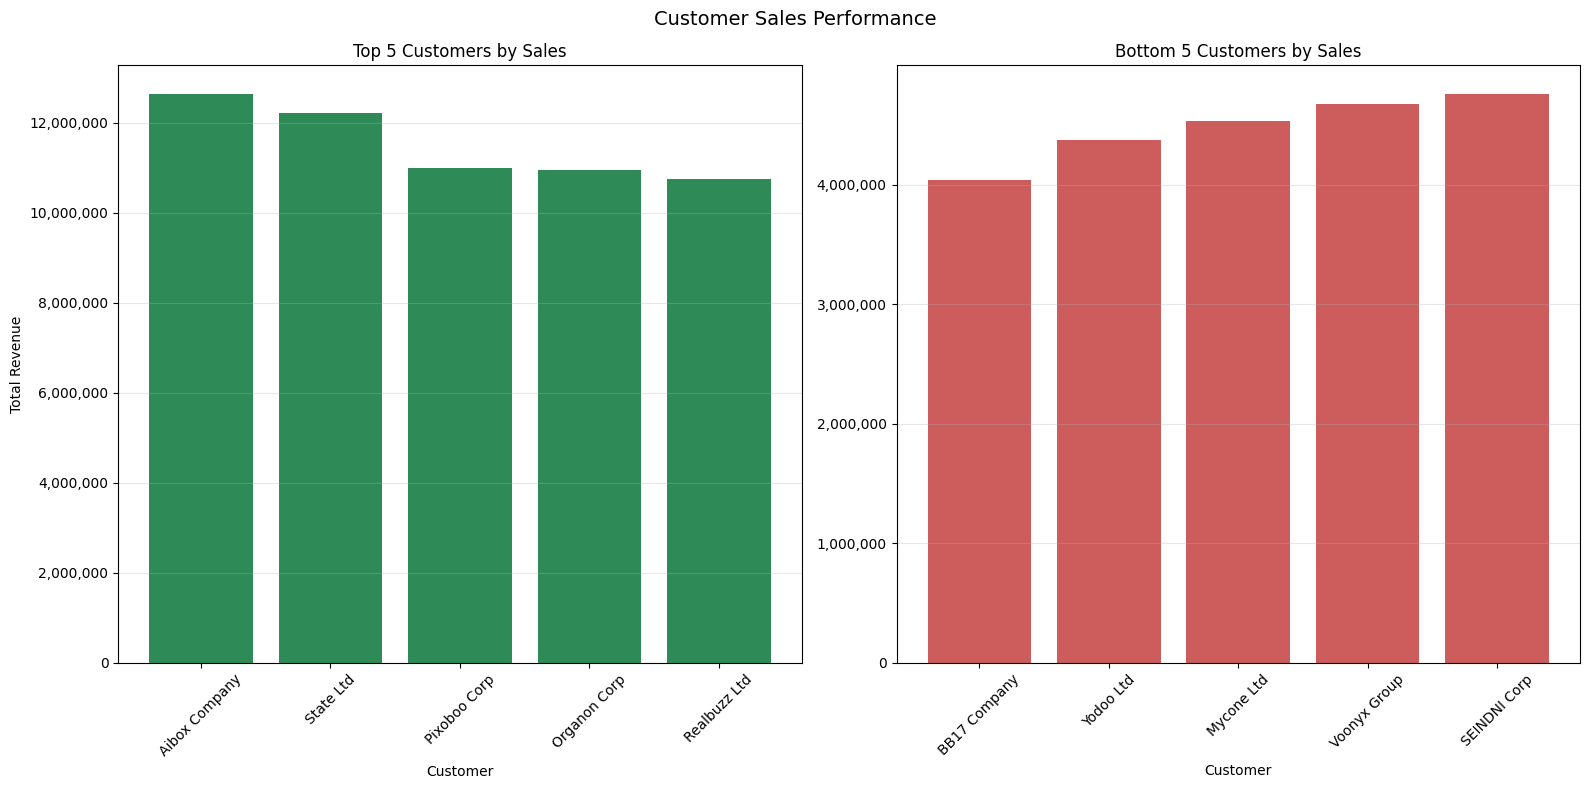

In [128]:
import matplotlib.ticker as mtick

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# ---- Top 5 Customers ----
axes[0].bar(
    top_5['customer_names'],
    top_5['total_revenue'],
    color='seagreen'
)
axes[0].set_title('Top 5 Customers by Sales')
axes[0].set_xlabel('Customer')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=45)

axes[0].yaxis.set_major_formatter(
    mtick.StrMethodFormatter('{x:,.0f}')
)

# ---- Bottom 5 Customers ----
axes[1].bar(
    bottom_5['customer_names'],
    bottom_5['total_revenue'],
    color='indianred'
)
axes[1].set_title('Bottom 5 Customers by Sales')
axes[1].set_xlabel('Customer')
axes[1].tick_params(axis='x', rotation=45)

axes[1].yaxis.set_major_formatter(
    mtick.StrMethodFormatter('{x:,.0f}')
)

# ---- Layout tweaks ----
for ax in axes:
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Customer Sales Performance', fontsize=14)
plt.tight_layout()
plt.show()


# 

   ---   END   ---

## 

## 